<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/collection-of-models/OUTLIER_CLEANING_DBProfessionalsSalary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/cleanedSalaryData(DataProfessionals).csv')
df.head()

,Unnamed: 0,Country,PrimaryDatabase,YearsWithThisDatabase,EmploymentStatus,JobTitle,HoursWorkedPerWeek,EmploymentSector,SalaryUSD
0,0,United States,Microsoft SQL Server,10,Full time employee,DBA,45,Private business,200000.0
1,1,United Kingdom,Microsoft SQL Server,15,Full time employee,DBA,35,Private business,61515.0
2,2,Germany,Microsoft SQL Server,5,Full time employee,Other,45,Private business,95000.0
3,3,United Kingdom,Microsoft SQL Server,6,Full time employee,DBA,40,Private business,56000.0
4,4,France,Microsoft SQL Server,10,Full time employee,DBA,40,Private business,35000.0


In [224]:
df = df[['YearsWithThisDatabase', 'HoursWorkedPerWeek', 'SalaryUSD']]
df.head()

,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD
0,10,45,200000.0
1,15,35,61515.0
2,5,45,95000.0
3,6,40,56000.0
4,10,40,35000.0


In [225]:
columnsList = list(df.columns) # The columns you want to search for outliers in

columnsList

['YearsWithThisDatabase', 'HoursWorkedPerWeek', 'SalaryUSD']

In [226]:
# STANDARDIZING DATA

for c in range(len(columnsList)):
  df['Zscore',columnsList[c]] = (df[columnsList[c]]-df[columnsList[c]].mean())/df[columnsList[c]].std() 

df.head()

,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD,"(Zscore, YearsWithThisDatabase)","(Zscore, HoursWorkedPerWeek)","(Zscore, SalaryUSD)"
0,10,45,200000.0,-0.019578,0.261009,1.855511
1,15,35,61515.0,-0.012865,-1.161459,-0.541667
2,5,45,95000.0,-0.026291,0.261009,0.037959
3,6,40,56000.0,-0.024949,-0.450225,-0.637132
4,10,40,35000.0,-0.019578,-0.450225,-1.000643


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

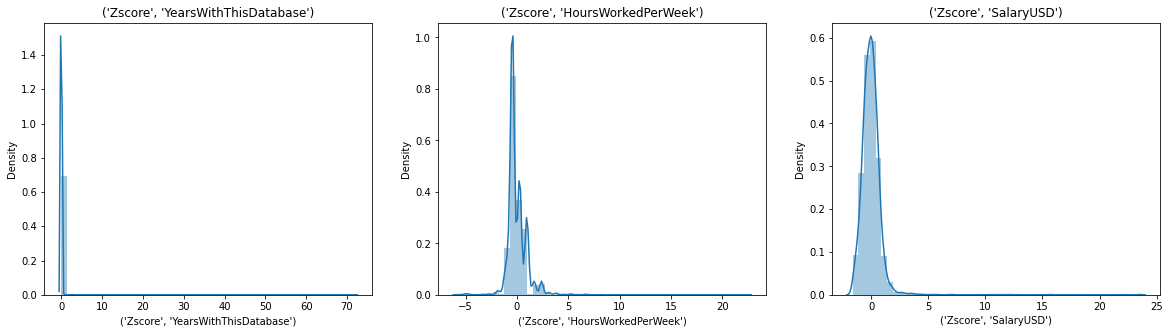

In [227]:
zscoreList = list(df.columns[3:])
fig = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for z in range(len(zscoreList)):
  plt.subplot(1,3,z+1)
  ax = sns.distplot(df[zscoreList[z]])
  title = zscoreList[z] 
  plt.title(title);



In [228]:
df.shape

(6893, 6)

In [229]:
# DROPPING OUTLIERS

for i in range(len(zscoreList)):
  df.drop(df[df[zscoreList[i]] > 3].index, inplace=True)
  df.drop(df[df[zscoreList[i]] < -3].index, inplace=True)

df.shape


(6744, 6)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

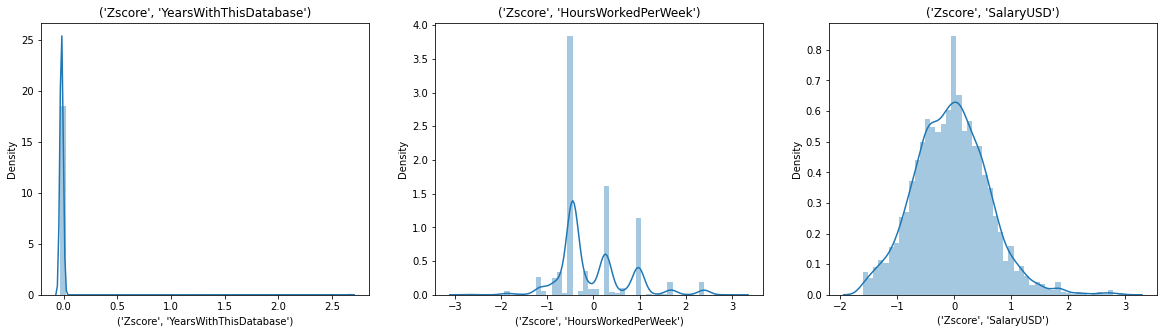

In [230]:
zscoreList = list(df.columns[3:])
fig = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for z in range(len(zscoreList)):
  plt.subplot(1,3,z+1)
  ax = sns.distplot(df[zscoreList[z]])
  title = zscoreList[z] 
  plt.title(title);



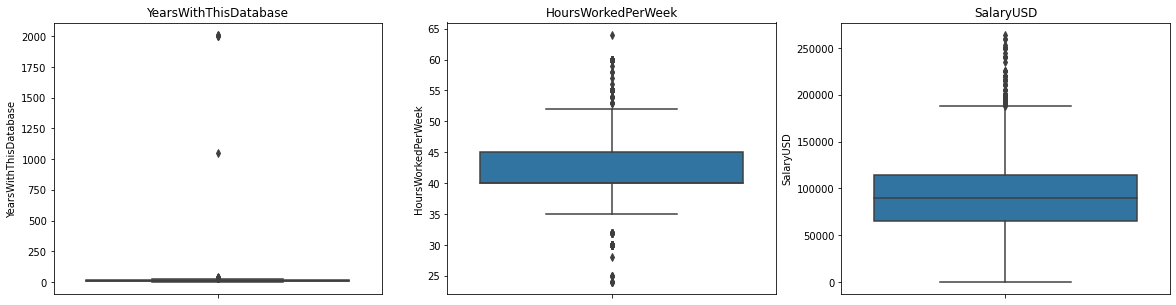

In [231]:
# We've noticed that there are more outliers

fig = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for z in range(len(columnsList)):
  plt.subplot(1,3,z+1)
  ax = sns.boxplot(y=columnsList[z], data=df)
  plt.title(columnsList[z])

In [232]:
df.head()

,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD,"(Zscore, YearsWithThisDatabase)","(Zscore, HoursWorkedPerWeek)","(Zscore, SalaryUSD)"
0,10,45,200000.0,-0.019578,0.261009,1.855511
1,15,35,61515.0,-0.012865,-1.161459,-0.541667
2,5,45,95000.0,-0.026291,0.261009,0.037959
3,6,40,56000.0,-0.024949,-0.450225,-0.637132
4,10,40,35000.0,-0.019578,-0.450225,-1.000643


In [233]:
# Drop more outliers 

df.drop(df[df['YearsWithThisDatabase'] > 40].index, inplace=True)
df.head()

,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD,"(Zscore, YearsWithThisDatabase)","(Zscore, HoursWorkedPerWeek)","(Zscore, SalaryUSD)"
0,10,45,200000.0,-0.019578,0.261009,1.855511
1,15,35,61515.0,-0.012865,-1.161459,-0.541667
2,5,45,95000.0,-0.026291,0.261009,0.037959
3,6,40,56000.0,-0.024949,-0.450225,-0.637132
4,10,40,35000.0,-0.019578,-0.450225,-1.000643


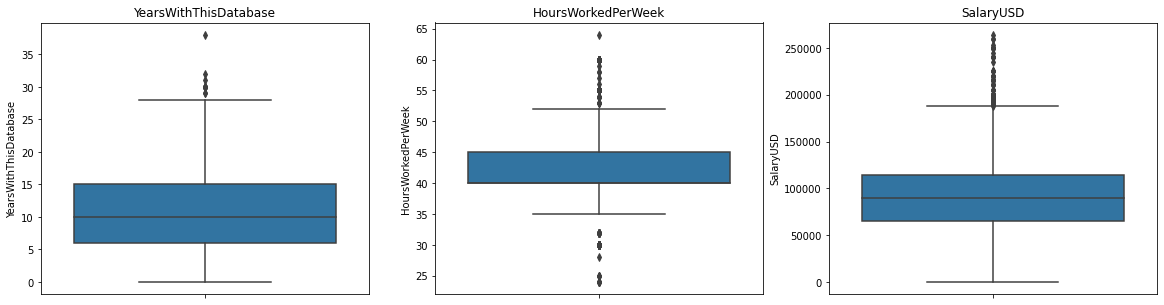

In [234]:
# Visualizing cleaned data

fig = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for z in range(len(columnsList)):
  plt.subplot(1,3,z+1)
  ax = sns.boxplot(y=columnsList[z], data=df)
  plt.title(columnsList[z])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

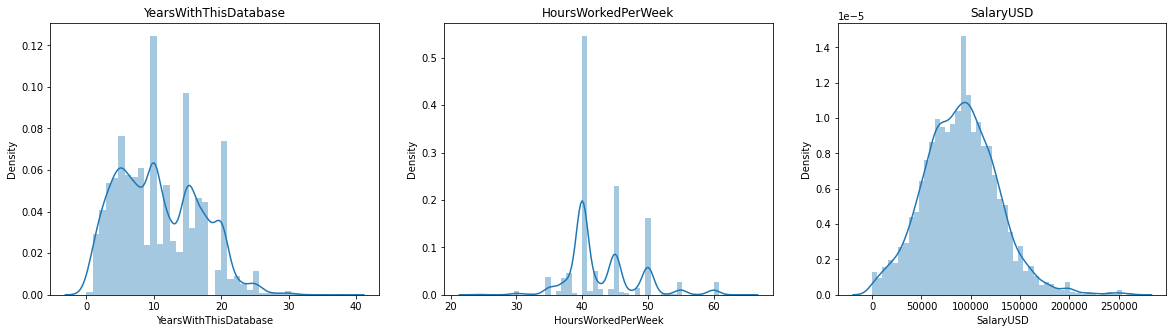

In [235]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

for z in range(len(columnsList)):
  plt.subplot(1,3,z+1)
  ax = sns.distplot(df[columnsList[z]])
  title = columnsList[z] 
  plt.title(title);



In [252]:
df.loc[df[(('Zscore', 'YearsWithThisDatabase'))] >= 0.007]

,YearsWithThisDatabase,HoursWorkedPerWeek,SalaryUSD,"(Zscore, YearsWithThisDatabase)","(Zscore, HoursWorkedPerWeek)","(Zscore, SalaryUSD)"
443,30,43,90000.0,0.007274,-0.023484,-0.048591
650,31,36,76650.0,0.008616,-1.019212,-0.279680
1069,30,44,64000.0,0.007274,0.118763,-0.498652
1185,30,37,68000.0,0.007274,-0.876965,-0.429412
1283,30,50,250000.0,0.007274,0.972244,2.721012
1427,30,35,120000.0,0.007274,-1.161459,0.470709
1694,38,40,51000.0,0.018014,-0.450225,-0.723682
2412,30,40,115000.0,0.007274,-0.450225,0.384159
3062,30,45,142000.0,0.007274,0.261009,0.851530
3895,30,50,130000.0,0.007274,0.972244,0.643809
